In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
d2 = pd.read_csv('data/D2.csv')

In [3]:
d2.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,insulin,change,diabetesMed,readmitted
0,AfricanAmerican,Female,[80-90),1,3,7,1,Invalid,33,0,...,No,No,No,No,No,No,Steady,False,True,1
1,Caucasian,Female,[70-80),1,3,5,3,Invalid,48,2,...,No,No,No,No,No,No,Steady,False,True,1
2,Caucasian,Female,[50-60),3,1,1,3,Orthopedics,25,1,...,No,No,No,No,No,No,Steady,False,True,0
3,AfricanAmerican,Female,[50-60),1,1,7,6,Invalid,41,0,...,No,No,No,No,No,No,Steady,False,True,1
4,AfricanAmerican,Male,[80-90),1,3,7,4,Invalid,22,0,...,No,No,No,No,No,No,Steady,False,True,1


In [4]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      20000 non-null  object
 1   gender                    20000 non-null  object
 2   age                       20000 non-null  object
 3   admission_type_id         20000 non-null  int64 
 4   discharge_disposition_id  20000 non-null  int64 
 5   admission_source_id       20000 non-null  int64 
 6   time_in_hospital          20000 non-null  int64 
 7   medical_specialty         20000 non-null  object
 8   num_lab_procedures        20000 non-null  int64 
 9   num_procedures            20000 non-null  int64 
 10  num_medications           20000 non-null  int64 
 11  number_outpatient         20000 non-null  int64 
 12  number_emergency          20000 non-null  int64 
 13  number_inpatient          20000 non-null  int64 
 14  number_diagnoses      

In [5]:
d2_cluster = d2[['num_lab_procedures', 'number_outpatient', 'number_inpatient', 'num_medications', 'time_in_hospital']]

In [6]:
d2_cluster.num_lab_procedures.value_counts(normalize=True).sort_index()

num_lab_procedures
1      0.03655
2      0.01250
3      0.00790
4      0.00545
5      0.00345
        ...   
103    0.00005
108    0.00005
109    0.00005
111    0.00005
118    0.00005
Name: proportion, Length: 107, dtype: float64

In [7]:
d2_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   num_lab_procedures  20000 non-null  int64
 1   number_outpatient   20000 non-null  int64
 2   number_inpatient    20000 non-null  int64
 3   num_medications     20000 non-null  int64
 4   time_in_hospital    20000 non-null  int64
dtypes: int64(5)
memory usage: 781.4 KB


In [8]:
d2_cluster.loc[:,'num_lab_procedures_log'] = np.sqrt(d2_cluster.loc[:,'num_lab_procedures'])

C:\Users\JohnMarquess\AppData\Local\Temp\ipykernel_10636\2829405942.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2_cluster.loc[:,'num_lab_procedures_log'] = np.sqrt(d2_cluster.loc[:,'num_lab_procedures'])


In [9]:
cap_value = d2_cluster['num_medications'].quantile(0.99)
d2_cluster.loc[:,'num_medications_capped'] = np.minimum(d2_cluster.loc[:,'num_medications'], cap_value)


C:\Users\JohnMarquess\AppData\Local\Temp\ipykernel_10636\759506385.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2_cluster.loc[:,'num_medications_capped'] = np.minimum(d2_cluster.loc[:,'num_medications'], cap_value)


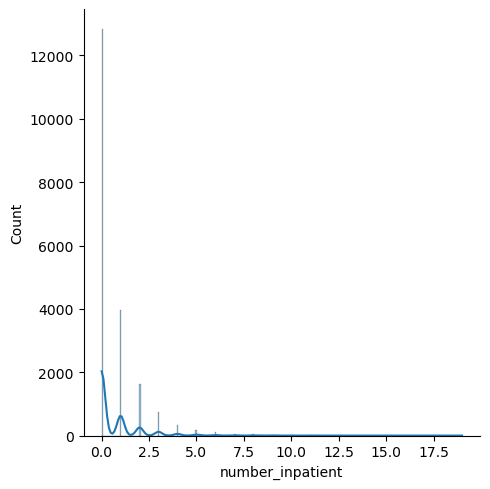

In [10]:
in_pat_dist = sns.displot(d2_cluster.number_inpatient, kde=True)
plt.show()

In [11]:
d2_cluster.number_inpatient.value_counts(normalize=True)

number_inpatient
0     0.64125
1     0.19895
2     0.08135
3     0.03795
4     0.01690
5     0.00925
6     0.00510
7     0.00325
8     0.00200
9     0.00140
11    0.00090
10    0.00080
12    0.00050
14    0.00010
15    0.00010
13    0.00010
19    0.00005
16    0.00005
Name: proportion, dtype: float64

In [12]:
d2_cluster.loc[:,'prior_outpatients'] = (d2_cluster['number_outpatient'] > 0).astype(int)


C:\Users\JohnMarquess\AppData\Local\Temp\ipykernel_10636\1389493971.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2_cluster.loc[:,'prior_outpatients'] = (d2_cluster['number_outpatient'] > 0).astype(int)


In [13]:
d2_cluster.loc[:,'prior_inpatients'] = (d2_cluster.loc[:,'number_inpatient'] > 0).astype(int)

C:\Users\JohnMarquess\AppData\Local\Temp\ipykernel_10636\1495451629.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2_cluster.loc[:,'prior_inpatients'] = (d2_cluster.loc[:,'number_inpatient'] > 0).astype(int)


In [14]:
d2_cluster.time_in_hospital.value_counts(normalize=True)

time_in_hospital
3     0.18525
2     0.17245
1     0.14480
4     0.13980
5     0.09790
6     0.07230
7     0.05785
8     0.03840
9     0.02605
10    0.01940
11    0.01685
12    0.01090
13    0.01065
14    0.00740
Name: proportion, dtype: float64

In [15]:
d2_kmeans = d2_cluster[['num_lab_procedures_log', 'num_medications_capped', 'time_in_hospital', 'prior_outpatients', 'prior_inpatients']]

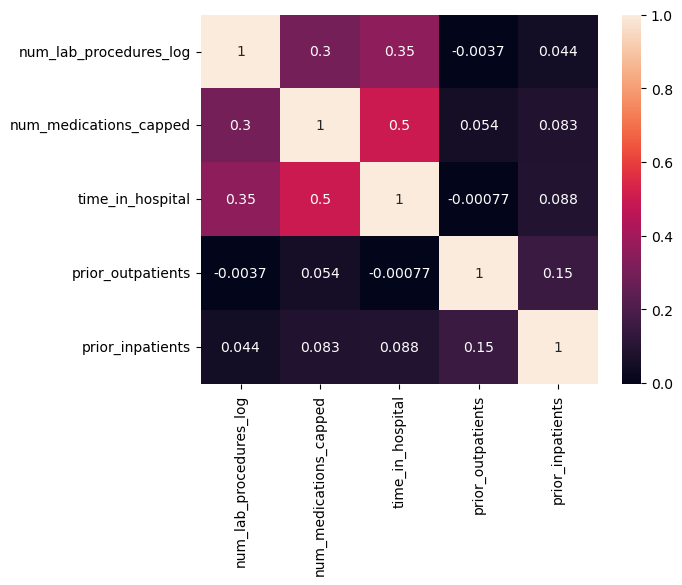

In [16]:
# plot a correlation matrix for d2_cluster
corr = d2_kmeans.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [17]:
from sklearn.cluster import KMeans

In [18]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

In [19]:
d2_kmeans

,num_lab_procedures_log,num_medications_capped,time_in_hospital,prior_outpatients,prior_inpatients
0,5.744563,14.0,1,0,1
1,6.928203,7.0,3,0,1
2,5.000000,15.0,3,0,0
3,6.403124,19.0,6,0,0
4,4.690416,12.0,4,0,1
...,...,...,...,...,...
19995,7.141428,12.0,4,1,1
19996,7.549834,28.0,9,1,1
19997,6.403124,18.0,3,0,0
19998,7.000000,15.0,3,0,1


In [20]:
log_lab_proc_scaled = standard_scaler.fit_transform(d2_kmeans[['num_lab_procedures_log']])
meds_scaled = min_max_scaler.fit_transform(d2_kmeans[['num_medications_capped']])
time_in_hosp_scaled = standard_scaler.fit_transform(d2_kmeans[['time_in_hospital']])

In [21]:
# create a new dataframe with the scaled values
d2_kmeans_scaled = pd.DataFrame({'num_lab_procedures_log': log_lab_proc_scaled.flatten(),
                                 'num_medications_capped': meds_scaled.flatten(),
                                 'time_in_hospital': time_in_hosp_scaled.flatten(),
                                 'prior_outpatients': d2_kmeans['prior_outpatients'],
                                 'prior_inpatients': d2_kmeans['prior_inpatients']})

In [22]:
d2_kmeans_scaled

,num_lab_procedures_log,num_medications_capped,time_in_hospital,prior_outpatients,prior_inpatients
0,-0.317655,0.317073,-1.132051,0,1
1,0.312309,0.146341,-0.430385,0,1
2,-0.713931,0.341463,-0.430385,0,0
3,0.032848,0.439024,0.622115,0,0
4,-0.878700,0.268293,-0.079551,0,1
...,...,...,...,...,...
19995,0.425793,0.268293,-0.079551,1,1
19996,0.643157,0.658537,1.674615,1,1
19997,0.032848,0.414634,-0.430385,0,0
19998,0.350521,0.341463,-0.430385,0,1


In [23]:
X = d2_kmeans_scaled.values

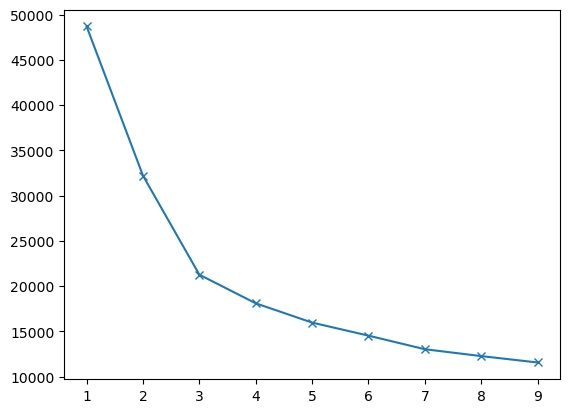

In [24]:
clusters = []
inertia_vals = []

for k in range(1, 10):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    
    clusters.append(model)
    inertia_vals.append(model.inertia_)
    
plt.plot(range(1, 10), inertia_vals, marker='x')

In [25]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(X)

KMeans(n_clusters=3, random_state=42)

In [26]:
print("Sum of intra-cluster distance:", model.inertia_)

Sum of intra-cluster distance: 21254.070783264953


In [27]:
d2_kmeans

,num_lab_procedures_log,num_medications_capped,time_in_hospital,prior_outpatients,prior_inpatients
0,5.744563,14.0,1,0,1
1,6.928203,7.0,3,0,1
2,5.000000,15.0,3,0,0
3,6.403124,19.0,6,0,0
4,4.690416,12.0,4,0,1
...,...,...,...,...,...
19995,7.141428,12.0,4,1,1
19996,7.549834,28.0,9,1,1
19997,6.403124,18.0,3,0,0
19998,7.000000,15.0,3,0,1


In [28]:
print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)

Centroid locations:
[0.58645078 0.52239181 1.42472857 0.20973934 0.41745807]
[ 0.23904243  0.34638899 -0.43226748  0.21714003  0.35064399]
[-1.97265288  0.28469946 -0.61767881  0.21640014  0.29329704]


In [29]:
d2_cluster = d2_cluster[['num_lab_procedures', 'number_outpatient', 'number_inpatient', 'num_medications', 'time_in_hospital']]

In [30]:
y = model.predict(X)
d2_cluster.loc[:,'Cluster_ID'] = y

In [31]:
print("Cluster membership")
print(d2_cluster['Cluster_ID'].value_counts())

Cluster membership
Cluster_ID
1    12119
0     4942
2     2939
Name: count, dtype: int64


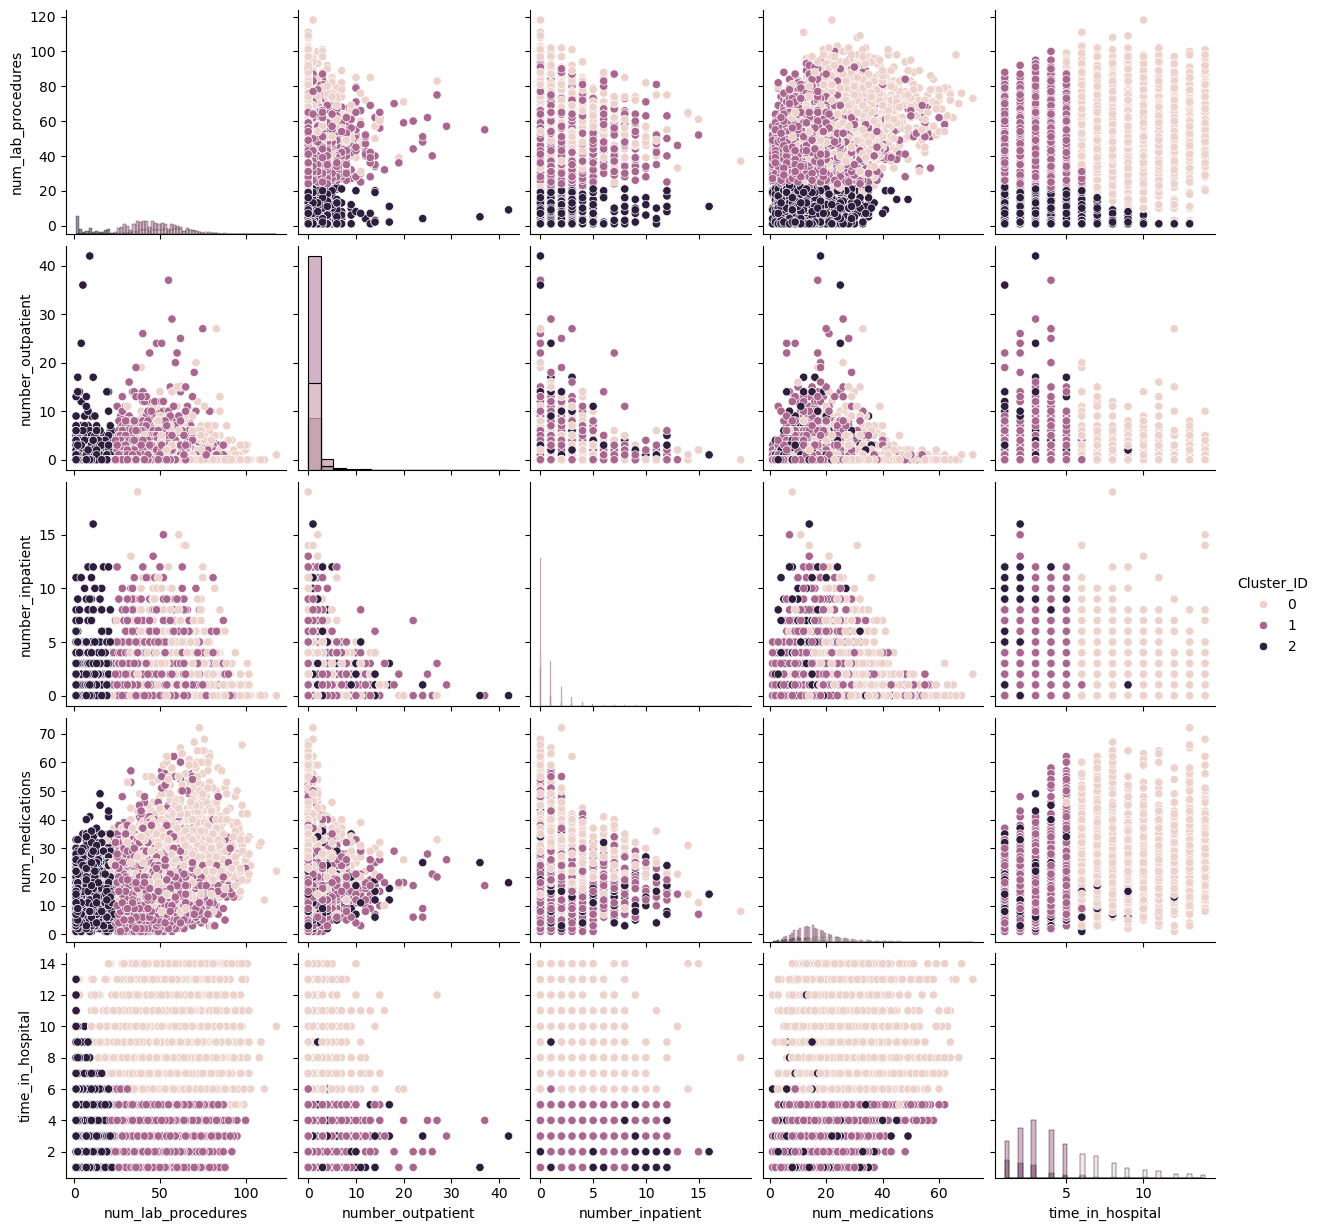

In [32]:
cluster_g = sns.pairplot(d2_cluster, hue='Cluster_ID', diag_kind='hist')
plt.show()